# Lets First understand about the tools

In [19]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [20]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=100)

In [21]:
tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [22]:
tool.name

'wikipedia'

In [23]:
tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [24]:
tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [25]:
tool.return_direct

False

In [26]:
print(tool.run({"query": "langchain"}))

Page: LangChain
Summary: LangChain is a framework designed to simplify the creation of applications 


In [27]:
tool.run("langchain")

'Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications '

In [28]:
from langchain_community.tools import YouTubeSearchTool

In [29]:
tool=YouTubeSearchTool()

In [30]:
tool.name

'youtube_search'

In [31]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [32]:
tool.run("sunny savita")

"['https://www.youtube.com/watch?v=ABK00e2XdPo&pp=ygUMc3Vubnkgc2F2aXRh', 'https://www.youtube.com/watch?v=ZC4avJGZNYs&pp=ygUMc3Vubnkgc2F2aXRh']"

In [33]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [34]:
tool = TavilySearchResults()

In [35]:
tool.invoke({"query": "What happened in the latest burning man floods"})

[{'url': 'https://www.npr.org/2023/09/03/1197497458/the-latest-on-the-burning-man-flooding',
  'content': "There are also reports that at least one person has died at the counterculture festival about a hundred miles north of Reno, Nev. Earlier this afternoon, I caught up with NPR's Claudia Peschiutta, who's at her first burn, and she told me it's muddy where she is, but that she and her camp family have been making the best of things.\n National\nThe latest on the Burning Man flooding\nClaudia Peschiutta\nAuthorities are investigating a death at the Burning Man festival in the Nevada desert after tens of thousands of people are stuck in camps because of rain.\n SCOTT DETROW, HOST:\nKnee-deep mud, warnings to conserve food and water, orders to shelter in place - this is all at Burning Man 2023 after torrential rains turned the Black Rock Desert into miles and miles of mud. I mean, mostly what I've seen from my personal experience is just any sort of need that you have, somebody, whethe

In [36]:
from langchain.agents import tool
@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)

In [37]:
get_word_length.invoke("abc")

3

In [38]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [40]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


# till here it is all about the builtin and custom tools

# this is class from the first version of langchain

# here showcase the different type 

https://github.com/langchain-ai/langchain/blob/master/libs/langchain/langchain/agents/agent_types.py

In [41]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [42]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

In [43]:
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [44]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

c:\Users\sunny\LangGraph-End-to-End-Course\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
'''from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")'''
from langchain_groq import ChatGroq
import os
llm=ChatGroq(model_name="Gemma2-9b-It")

In [46]:
from langchain.agents import AgentType
from langchain.agents import load_tools 
from langchain.agents import initialize_agent

In [47]:
tool=load_tools(["wikipedia"],llm=llm)

In [48]:
agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

In [51]:
agent.run("can you tell me what is current GDP of india?")

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Thought: I need to look up India's GDP on Wikipedia.
Action: wikipedia
Action Input: GDP of India 
Observation: Page: Economy of India
Summary: The economy of India is a developing mixed economy with a notable public sector in strategic sectors. It is the world's fifth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 125th by GDP (PPP). From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj. The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning. Since the start of the 21st century, annual a

"India's GDP is the world's fifth-largest by nominal GDP and the third-largest by purchasing power parity (PPP)."

# here is showcase the image with the output 

# here is showcase the complete detail explanation

# Now Built the Agent from the version v1 itself but this time use the predefine classes

## you can track everything using the langsmith

In [52]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [53]:
search = TavilySearchResults()

In [54]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1726991564, 'localtime': '2024-09-22 00:52'}, 'current': {'last_updated_epoch': 1726991100, 'last_updated': '2024-09-22 00:45', 'temp_c': 15.6, 'temp_f': 60.1, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 238, 'wind_dir': 'WSW', 'pressure_mb': 1014.0, 'pressure_in': 29.93, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 93, 'cloud': 75, 'feelslike_c': 15.6, 'feelslike_f': 60.1, 'windchill_c': 13.0, 'windchill_f': 55.5, 'heatindex_c': 13.6, 'heatindex_f': 56.4, 'dewpoint_c': 12.9, 'dewpoint_f': 55.1, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 1.0, 'gust_mph': 8.3, 'gust_kph': 13.4}}"},
 {'url': 'https://www.almanac.com/weather/l

In [55]:
tools = [search]

In [56]:
from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [57]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [58]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [59]:
agent_executor.invoke({"input": "hi!"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'What is the capital of France?'}`


[{'url': 'https://www.britannica.com/facts/Paris', 'content': 'Paris is the capital of France, located in the north-central part of the country. It is a major centre of commerce, culture, and tourism, with famous landmarks such as the Eiffel Tower, the Louvre Museum, and Notre-Dame de Paris.'}, {'url': 'https://simple.wikipedia.org/wiki/Capital_of_France', 'content': 'Learn about the history and current status of the capital of France, which is Paris. Find out which other cities have been the national capital in different periods of time.'}, {'url': 'https://simple.wikipedia.org/wiki/Paris', 'content': 'Events[change | change source]\nRelated pages[change | change source]\nReferences[change | change source]\nOther websites[change | change source]\nAmsterdam, Netherlands\xa0·\nAthens, Greece\xa0·\nBerlin, Germany\xa0·\nBratislava, Slovakia\xa0·\nBrussels, Belgium\xa0·\nBucharest, Romania\xa0·\nB

{'input': 'hi!', 'output': 'Paris'}

In [60]:
agent_executor.invoke({"input": "how can langsmith help with testing?"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'how can langsmith help with testing?'}`


[{'url': 'https://blog.langchain.dev/announcing-langsmith/', 'content': 'We consistently see developers relying on LangSmith to track the system-level performance of their application (like latency and cost), track the model/chain performance (through associating feedback with runs), debug issues (diving into a particular run that went wrong), and establish a broad understanding of how users are interacting with their application and what their experience is like.\n Over the last few months, we’ve been working directly with some early design partners and testing it on our own internal workflows, and we’ve found LangSmith helps teams in 5 core ways:\nDebugging\nLangSmith gives you full visibility into model inputs and output of every step in the chain of events. As a very simple example, we considered it to be table stakes for LangSmith to help users easily create datasets from existing lo

{'input': 'how can langsmith help with testing?',
 'output': 'Langsmith can help with testing by providing a platform for debugging, testing, and improving LLM applications and agents. It allows you to track the system-level performance of your application,  track the model/chain performance, debug issues, and understand how users are interacting with your application. LangSmith offers features like creating datasets from existing logs, running evaluations, and tracking results, making it a valuable tool for the development and testing of LLM applications. \n'}

In [61]:
agent_executor.invoke({"input": "whats the weather in sf?"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'weather in sf'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1726991564, 'localtime': '2024-09-22 00:52'}, 'current': {'last_updated_epoch': 1726991100, 'last_updated': '2024-09-22 00:45', 'temp_c': 15.6, 'temp_f': 60.1, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 238, 'wind_dir': 'WSW', 'pressure_mb': 1014.0, 'pressure_in': 29.93, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 93, 'cloud': 75, 'feelslike_c': 15.6, 'feelslike_f': 60.1, 'windchill_c': 13.0, 'windchill_f': 55.5, 'heatindex_c': 13.6, 'heatindex_f': 56.4, 'dewpoint_c': 12.9, 'dewpoint_f': 55.1, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 1.0, 'gust_mp

{'input': 'whats the weather in sf?',
 'output': 'The weather in San Francisco is currently 15.6 degrees Celsius and partly cloudy. \n'}

## Add one more tool(RAG tool)

In [64]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [65]:
loader = WebBaseLoader("https://docs.smith.langchain.com/overview")
docs = loader.load()

In [77]:
docs

[Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='\n\n\n\n\nGet started with LangSmith | 🦜️🛠️ LangSmith\n\n\n\n\n\n\n\nSkip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith\u200bPythonTypeScriptpip install -U langsmithya

In [67]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [68]:
retriever.invoke("how to upload a dataset")[0]

Document(metadata={'source': 'https://docs.smith.langchain.com/overview', 'title': 'Get started with LangSmith | 🦜️🛠️ LangSmith', 'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en'}, page_content='description="A sample dataset in LangSmith.")client.create_examples(    inputs=[        {"postfix": "to LangSmith"},        {"postfix": "to Evaluations in LangSmith"},    ],    outputs=[        {"output": "Welcome to LangSmith"},        {"output": "Welcome to Evaluations in LangSmith"},    ],    dataset_id=dataset.id,)# Define your evaluatordef exact_match(run, example):    return {"score": run.outputs["output"] == example.outputs["output"]}experiment_results = evaluate(    lambda input: "Welcome " + input[\'postfix\'], # Your AI system goes here    data=dataset_name,

In [69]:
from langchain.tools.retriever import create_retriever_tool

In [70]:
retriever_tool = create_retriever_tool(
    retriever,
    "langsmith_search",
    "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!",
)

In [71]:
tools = [search, retriever_tool]

In [72]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [73]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [74]:
agent_executor.invoke({"input": "hi!"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'What is LangSmith?'}`


[{'url': 'https://www.langchain.ca/blog/what-is-langsmith/', 'content': 'Langsmith is an application framework for language models equipped with LLM tools and agent support. It focuses on addressing challenges faced during language model development for production. This guide offers an in-depth look into the essential features and functionalities of Langsmith. Understanding Langsmith vs Langchain Prior to exploring Langsmith, it'}, {'url': 'https://www.infoworld.com/article/2335081/what-is-langsmith-tracing-and-debugging-for-llms.html', 'content': 'LangSmith is a platform for building production-grade LLM applications. It lets you debug, test, evaluate, and monitor chains and intelligent agents built on any LLM framework and seamlessly ...'}, {'url': 'https://www.youtube.com/watch?v=jx7xuHlfsEQ', 'content': 'LangSmith is a unified DevOps platform for developing, collaborating, testing, deploying, and monit

{'input': 'hi!',
 'output': '```json\n{"tool_call": {"id": "pending", "type": "function", "function": {"name": "langsmith_search"}, "parameters": {"query": "How to debug with Langsmith"}}}\n```'}

In [78]:
agent_executor.invoke({"input": "what is a langsmith?"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `langsmith_search` with `{'query': 'what is a langsmith?'}`


Skip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith​PythonTypeScriptpip install -U langsmithyarn add langsmith2. Create an API key​To create an API key head to the Settings page. Then click Create API Key.3. Set up your environment​Shellexport LANGCHAIN_TRACING_V2=trueexport LANGCHAIN_API_KEY=<your-api-key># The below examples use the OpenAI API, though it's not necessary in generalexport OPENAI_API_KEY=<your-openai-api-key>4. Log your first trace​Tracing to LangSmith for LangChain usersThere is no need to use the La

{'input': 'what is a langsmith?',
 'output': 'LangSmith is a platform for building production-grade LLM applications. \n\nIt allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. \n'}

In [76]:
agent_executor.invoke({"input": "whats the weather in sf?"})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'weather in san francisco'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1726991763, 'localtime': '2024-09-22 00:56'}, 'current': {'last_updated_epoch': 1726991100, 'last_updated': '2024-09-22 00:45', 'temp_c': 15.6, 'temp_f': 60.1, 'is_day': 0, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}, 'wind_mph': 4.9, 'wind_kph': 7.9, 'wind_degree': 238, 'wind_dir': 'WSW', 'pressure_mb': 1014.0, 'pressure_in': 29.93, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 93, 'cloud': 75, 'feelslike_c': 15.6, 'feelslike_f': 60.1, 'windchill_c': 13.0, 'windchill_f': 55.5, 'heatindex_c': 13.6, 'heatindex_f': 56.4, 'dewpoint_c': 12.9, 'dewpoint_f': 55.1, 'vis_km': 16.0, 'vis_miles': 9.0, 'uv': 1.

{'input': 'whats the weather in sf?',
 'output': 'The weather in San Francisco will be partly cloudy with a temperature of 60.1°F (15.6°C)'}

In [79]:
# Here we pass in an empty list of messages for chat_history because it is the first message in the chat
agent_executor.invoke({"input": "hi! my name is bob", "chat_history": []})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


<tool-call>
{
	"tool_call": {
		"id": "pending",
		"type": "function",
		"function": {
			"name": "tavily_search_results_json"
		},
		"parameters": {
			"query": "my name is bob"
		}
	}
}
</tool-call> 


> Finished chain.


{'input': 'hi! my name is bob',
 'chat_history': [],
 'output': '<tool-call>\n{\n\t"tool_call": {\n\t\t"id": "pending",\n\t\t"type": "function",\n\t\t"function": {\n\t\t\t"name": "tavily_search_results_json"\n\t\t},\n\t\t"parameters": {\n\t\t\t"query": "my name is bob"\n\t\t}\n\t}\n}\n</tool-call> \n'}

In [80]:
from langchain_core.messages import AIMessage, HumanMessage

In [81]:
agent_executor.invoke(
    {
        "chat_history": [
            HumanMessage(content="hi! my name is bob"),
            AIMessage(content="Hello Bob! How can I assist you today?"),
        ],
        "input": "what's my name?",
    }
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Your name is Bob.

> Finished chain.


{'chat_history': [HumanMessage(content='hi! my name is bob', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={}, response_metadata={})],
 'input': "what's my name?",
 'output': 'Your name is Bob.'}

In [82]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [83]:
message_history = ChatMessageHistory()

In [84]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    lambda session_id: message_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [85]:
agent_with_chat_history.invoke(
    {"input": "hi! I'm bob"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "<foo>"}},
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `langsmith_search` with `{'query': 'What is LangSmith?'}`


Skip to main contentGo to API DocsSearchRegionUSEUGo to AppQuick startTutorialsHow-to guidesConceptsReferencePricingSelf-hostingLangGraph CloudQuick startOn this pageGet started with LangSmithLangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!1. Install LangSmith​PythonTypeScriptpip install -U langsmithyarn add langsmith2. Create an API key​To create an API key head to the Settings page. Then click Create API Key.3. Set up your environment​Shellexport LANGCHAIN_TRACING_V2=trueexport LANGCHAIN_API_KEY=<your-api-key># The below examples use the OpenAI API, though it's not necessary in generalexport OPENAI_API_KEY=<your-openai-api-key>4. Log your first trace​Tracing to LangSmith for LangChain usersThere is no need to use the Lang

{'input': "hi! I'm bob",
 'chat_history': [],
 'output': 'LangSmith is a platform for building production-grade LLM applications.  It lets you debug, test, evaluate, and monitor chains and intelligent agents built on any LLM framework and seamlessly connect them to your existing tools and workflows. \n\n\n'}

In [86]:
agent_with_chat_history.invoke(
    {"input": "what's my name?"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "<foo>"}},
)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


You said your name is bob.  


> Finished chain.


{'input': "what's my name?",
 'chat_history': [HumanMessage(content="hi! I'm bob", additional_kwargs={}, response_metadata={}),
  AIMessage(content='LangSmith is a platform for building production-grade LLM applications.  It lets you debug, test, evaluate, and monitor chains and intelligent agents built on any LLM framework and seamlessly connect them to your existing tools and workflows. \n\n\n', additional_kwargs={}, response_metadata={})],
 'output': 'You said your name is bob.  \n'}

# Now Lets Start with ReAct Agent

React agents and function calling agents are two distinct approaches to leveraging Large Language Models (LLMs) for automating tasks. Both methods aim to integrate LLMs with external tools and systems, but they differ in their underlying logic and implementation.

React Agent

A React agent combines reasoning and action in a continuous loop. The LLM “thinks” about the problem, decides the steps to be taken, allows the agent to take action based on its reasoning, and then observes the result to refine its understanding. This approach relies on “ReACT prompting,” which involves crafting prompts that guide the LLM to alternate between reasoning and action steps.

Key features of React agents:

Reasoning and action loop: The agent continuously reasons about the task, decides on actions, and observes the outcomes to refine its understanding.
ReACT prompting: The agent uses specific prompting techniques to guide the LLM’s reasoning and action steps.
Agent types: React agents are tailored for specific tasks and utilize CoT (Conversational Task) and ReACT prompting.
Strengths: Suitable for tasks requiring multi-step reasoning, complex planning, and understanding of context.
Limitations: Can be computationally expensive due to the reasoning steps involved and requires more effort to define prompts and actions.
Function Calling Agent

A function calling agent, introduced by OpenAI, allows LLMs to understand a pre-defined format of a function (JSON structure) as part of a user prompt and intelligently choose to output a JSON object containing arguments to call a function (tool in an agent). This approach relies on pre-defined functions and their parameters.

Key features of function calling agents:

Pre-defined functions: The agent uses pre-defined functions with well-defined parameters and outputs.
JSON-based input: The agent receives JSON objects containing function names and arguments.
Agent simplicity: Function calling agents are generally easier to implement, relying on pre-defined functions and parameters.
Strengths: Excels at integrating LLMs with external systems and performing specific tasks through well-defined functions.
Limitations: Less suitable for open-ended tasks where actions are not pre-defined.
Comparison

In summary, React agents are suitable for tasks requiring complex reasoning and planning, while function calling agents excel at integrating LLMs with external systems and performing specific tasks through well-defined functions. The choice between these two approaches depends on the nature of the task and the desired level of automation.

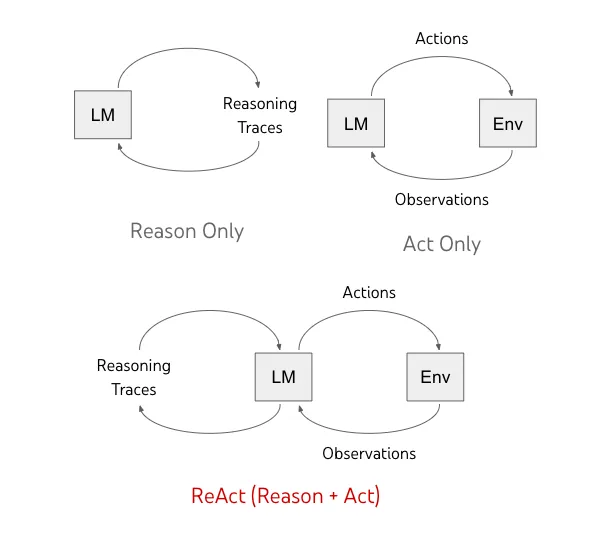

https://medium.com/@terrycho/how-langchain-agent-works-internally-trace-by-using-langsmith-df23766e7fb4

In [89]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor, create_react_agent
import os

In [96]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [97]:
SERPER_API_KEY=os.getenv("SERPER_API_KEY")

In [98]:
SERPER_API_KEY

'98b830ee62b115e37b3fb9be154835a0040362d4'

In [99]:
os.environ["SERPER_API_KEY"] = SERPER_API_KEY

In [100]:
model = llm

In [101]:
google_search = GoogleSerperAPIWrapper()
tools = [
    Tool(
        name="Intermediate Answer",
        func=google_search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]


In [102]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [103]:
prompt = PromptTemplate.from_template(template)

In [104]:
search_agent = create_react_agent(model,tools,prompt)
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

In [105]:
response = agent_executor.invoke({"input": "Where is the hometown of the 2007 US PGA championship winner and his score?"})
print(response)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


Question: Where is the hometown of the 2007 US PGA championship winner and his score?
Thought: I need to figure out who won the 2007 US PGA Championship and their hometown.
Action: Intermediate Answer
Action Input: Who won the 2007 US PGA Championship?Tiger Woods claimed his fourth PGA Championship and improved to 13–0 in major championships when holding at least a share of the 54-hole lead. He led by as many as five strokes in the third and fourth rounds.Thought: I need to find Tiger Woods' hometown.
Action: Intermediate Answer
Action Input: Where is Tiger Woods from?Cypress, CAI now know the final answer
Final Answer: Tiger Woods, the winner of the 2007 US PGA Championship, is from Cypress, CA. His score was 12 under par. 


> Finished chain.
{'input': 'Where is the hometown of the 2007 US PGA championship winner and his score?', 'output': 'Tiger Woods, the winner of the 2007 US PGA Championship, is from Cypress, CA. His score was 12 under par.', 'intermediate_steps': [(AgentAction(t

# This given code from the latest version
https://python.langchain.com/docs/tutorials/agents/

https://python.langchain.com/v0.2/docs/concepts/#agents

In [ ]:
# Import relevant functionality
from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Create the agent
memory = MemorySaver()
model = ChatAnthropic(model_name="claude-3-sonnet-20240229")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

# Use the agent
config = {"configurable": {"thread_id": "abc123"}}
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config
):
    print(chunk)
    print("----")

for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

## ReAct Agent with very good usecase

In [ ]:
# You need to set the environmental variable OPENAI_API_KEY
from langchain_openai import ChatOpenAI
from langchain.tools import tool
from langchain import hub


# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react")
model = ChatOpenAI(model='gpt-4-0125-preview')

tools = [get_employee_salary, get_employee_id]
agent = create_react_agent(model,tools, prompt)
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)
agent_executor.invoke({"input":"What is the Salary of Evan?"})

In [ ]:
agent_executor.invoke({"input":"What is the Salary of Evan?"})

# Create a custom agent

In [ ]:
from langchain.agents import tool


@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)


get_word_length.invoke("abc")

In [ ]:
tools = [get_word_length]

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are very powerful assistant, but don't know current events",
        ),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [ ]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

In [ ]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
list(agent_executor.stream({"input": "How many letters in the word eudca"}))

In [ ]:
llm.invoke("How many letters in the word educa")

In [ ]:
from langchain_core.prompts import MessagesPlaceholder

MEMORY_KEY = "chat_history"
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are very powerful assistant, but bad at calculating lengths of words.",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage

chat_history = []

In [ ]:
agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
input1 = "how many letters in the word educa?"
result = agent_executor.invoke({"input": input1, "chat_history": chat_history})
chat_history.extend(
    [
        HumanMessage(content=input1),
        AIMessage(content=result["output"]),
    ]
)
agent_executor.invoke({"input": "is that a real word?", "chat_history": chat_history})

https://python.langchain.com/v0.1/docs/modules/agents/how_to/custom_agent/

# Create A agent from scratch with more low level code